In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [9]:
df=pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [10]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df.shape

(500, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [13]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [16]:
df.duplicated().sum()

0

In [17]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
df.drop(columns=['Serial No.'],inplace=True)

In [19]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [23]:
 y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
X_train.shape

(400, 7)

In [26]:
X_test.shape

(100, 7)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [33]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from keras.layers import Dense

In [120]:
model=Sequential()

# model.add(Dense(7,activation="relu",input_dim=7))
# model.add(Dense(1,activation='linear'))

#one added more layers 
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [121]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 7)                 56        
                                                                 
 dense_20 (Dense)            (None, 7)                 56        
                                                                 
 dense_21 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [132]:
#model.compile(loss='mean_squared_error',optimizer="Adam")
model.compile(loss='mean_squared_error',optimizer="Adam",metrics=['mean_squared_error'])

In [133]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2,workers=5)

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 7/100
10/10 [==============

In [134]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [135]:
from sklearn.metrics import r2_score

In [136]:
r2_score(y_test,y_pred)

0.8119929450440829

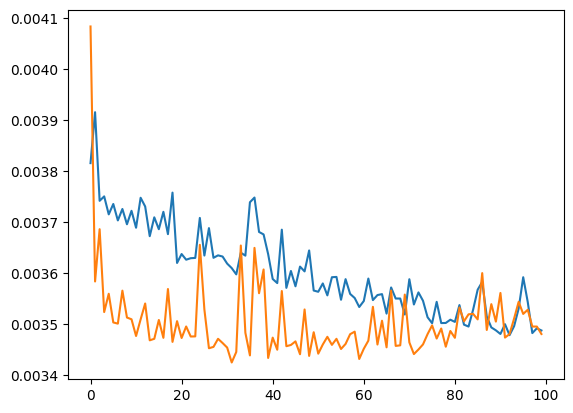

In [137]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

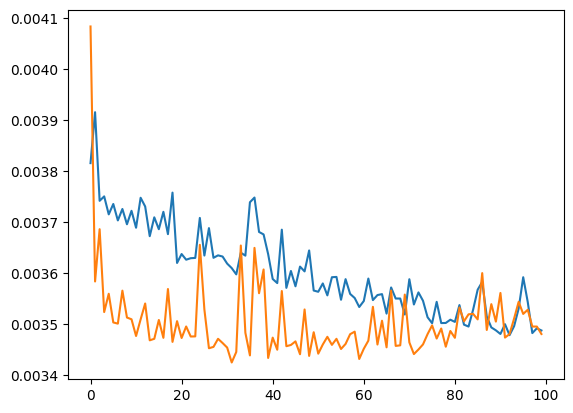

In [138]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])